In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('german_credit_train.csv')
df.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [4]:
print(len(df.columns))
df.columns

21


Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

In [5]:
numerical_cols = [
    'LoanDuration',
    'LoanAmount',
    'InstallmentPercent',
    'CurrentResidenceDuration',
    'Age',
    'ExistingCreditsCount',
]
categorical_cols = [
  'CheckingStatus',
  'CreditHistory',
 'LoanPurpose',
 'ExistingSavings',
 'EmploymentDuration',
 'Sex',
 'OthersOnLoan',
 'OwnsProperty',
 'InstallmentPlans',
 'Housing',
 'Job',
 'Dependents',
 'Telephone',
 'ForeignWorker',]

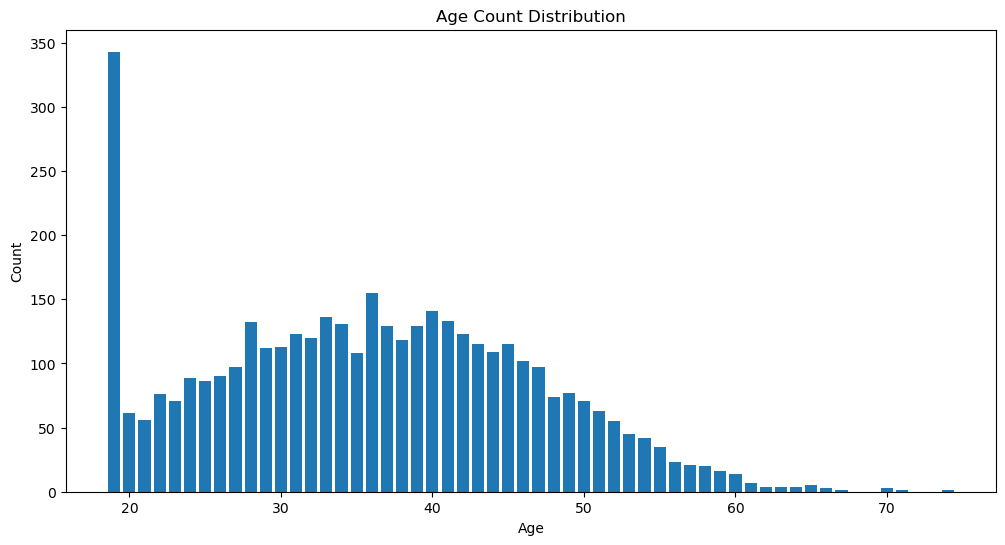

In [6]:
age_cnt = df['Age'].value_counts().sort_index()  # Sort ages in ascending order

# Plot using Matplotlib
plt.figure(figsize=(12,6))
plt.bar(age_cnt.index, age_cnt.values)  # x = Age, y = Count
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Count Distribution")
plt.show()

In [7]:
df['Sex'].value_counts()

Sex
male      2480
female    1519
Name: count, dtype: int64

In [8]:
df['LoanAmount'].describe()

count     3999.000000
mean      3482.700925
std       2498.295579
min        250.000000
25%       1300.500000
50%       3250.000000
75%       5363.000000
max      11676.000000
Name: LoanAmount, dtype: float64

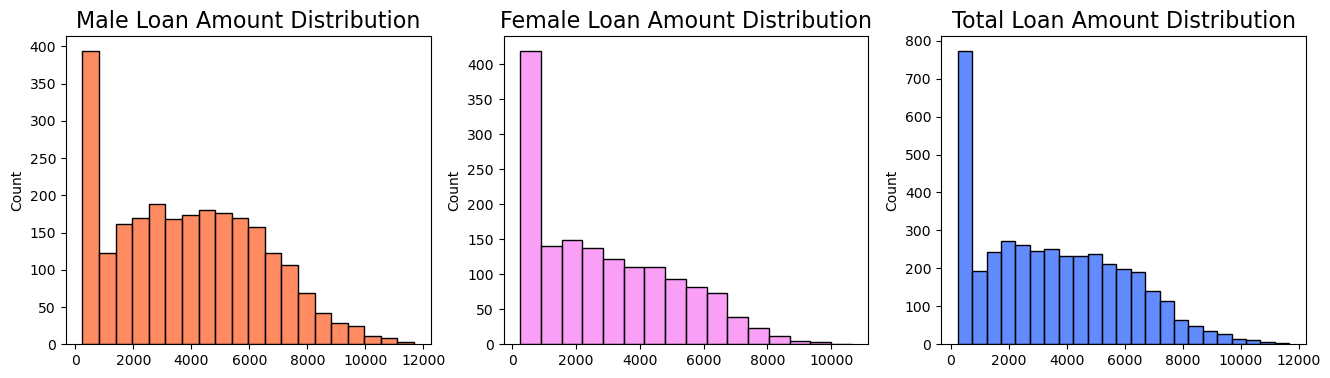

In [9]:
male_credit = df["LoanAmount"].loc[df["Sex"] == "male"].values
female_credit = df["LoanAmount"].loc[df["Sex"] == "female"].values
total_credit = df['LoanAmount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.histplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Loan Amount Distribution", fontsize=16)
sns.histplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Loan Amount Distribution", fontsize=16)
sns.histplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Loan Amount Distribution", fontsize=16)
plt.show()

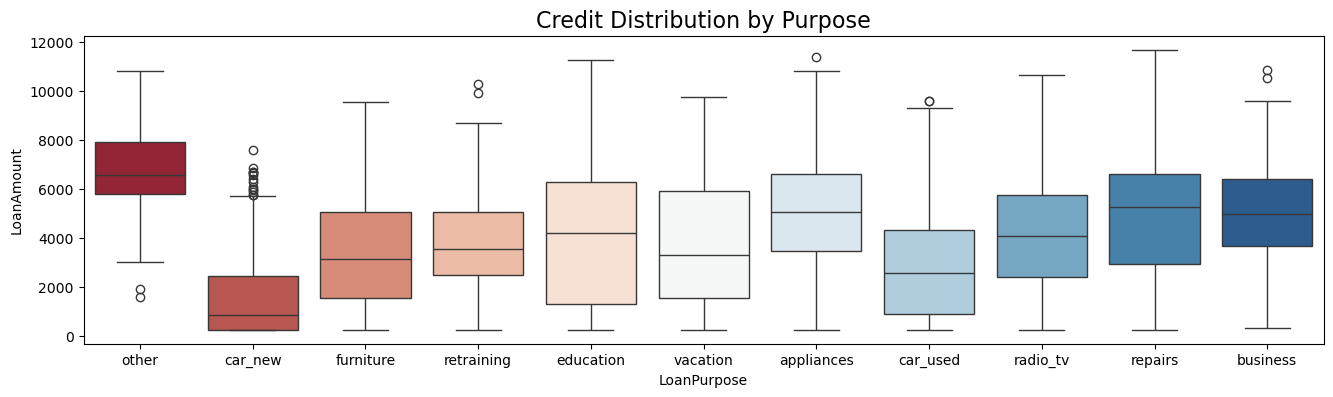

In [21]:
plt.figure(figsize=(16, 4)) #figure size

g = sns.boxplot(x='LoanPurpose', y='LoanAmount', data=df, 
                hue='LoanPurpose', palette="RdBu", legend=False)

g.set_title("Credit Distribution by Purpose", fontsize=16)
# g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
plt.show()

In [11]:
pd.crosstab(df["Sex"],df["Risk"])

Risk,No Risk,Risk
Sex,,
female,1060,459
male,1609,871


In [13]:
df["Risk"].value_counts() / len(df)

Risk
No Risk    0.667417
Risk       0.332583
Name: count, dtype: float64

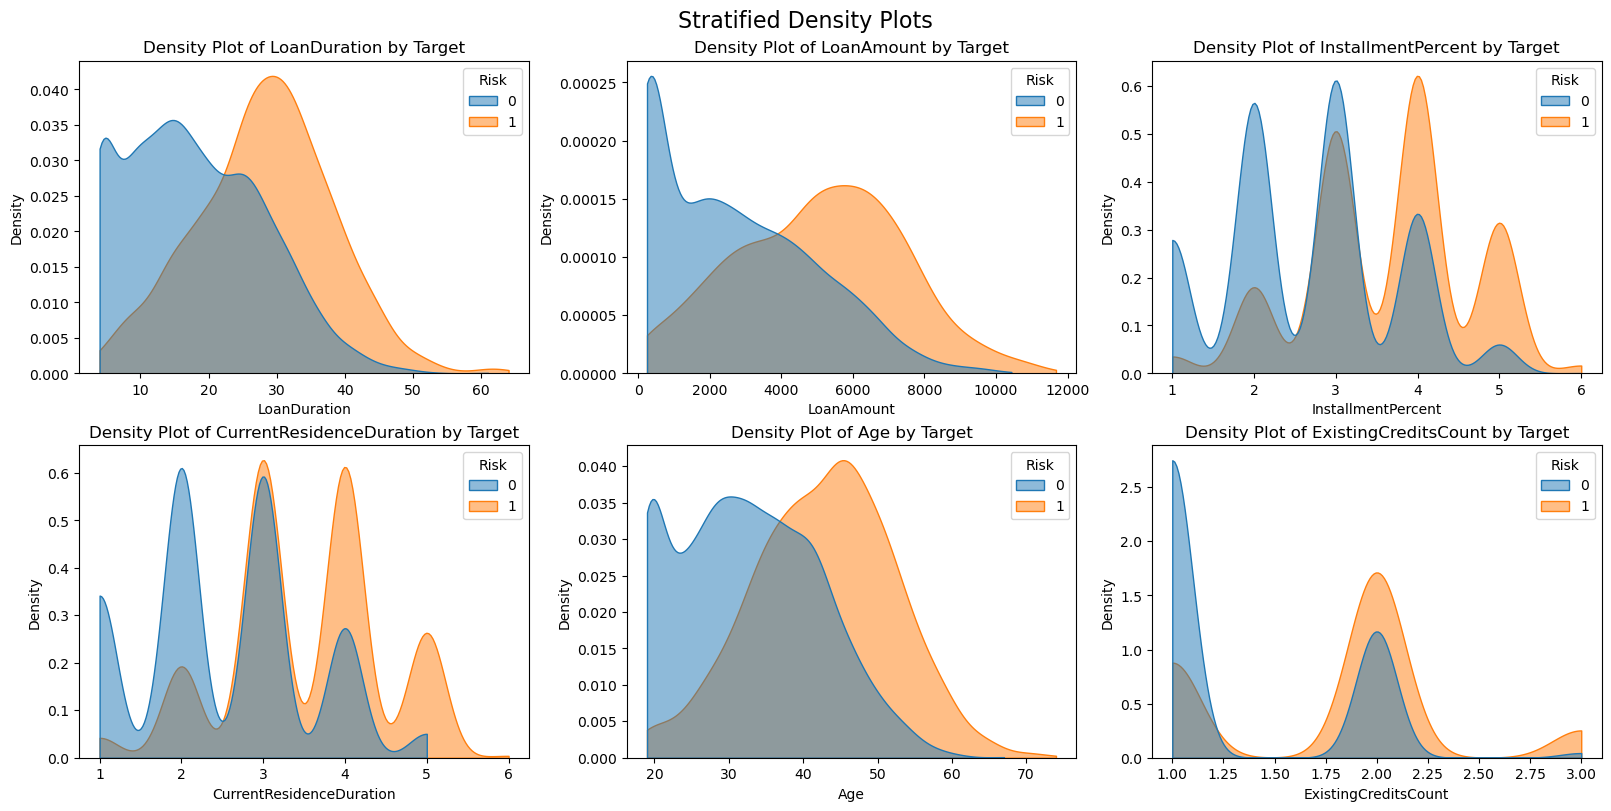

In [14]:
df_plot = df.copy()
df_plot['Risk'] = (df_plot['Risk'] == 'Risk').astype(int)

ncols = 3
nrows = (len(numerical_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 4 * nrows), constrained_layout=True)
axes = axes.flatten()

for i, this_var in enumerate(numerical_cols):
    sns.kdeplot(data=df_plot,
                x=this_var, 
                hue='Risk', 
                fill=True, 
                common_norm=False,
                cut=0,
                alpha=0.5,
                ax=axes[i])
    axes[i].set_title(f'Density Plot of {this_var} by Target', fontsize=12)
fig.suptitle('Stratified Density Plots', fontsize=16)
plt.show()

>If curves far apart, then the feature might help distinguish classes; while if overlaps a lot, then my be less useful for classification.

In [15]:
df[df["Risk"] == "Risk"].describe()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,28.108271,5052.430075,3.627068,3.502256,42.693233,1.779699,1.283459
std,10.000166,2339.264580,1.005263,0.965349,9.563413,0.591164,0.450847
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,21.250000,3284.500000,3.000000,3.000000,36.000000,1.000000,1.000000
50%,29.000000,5193.500000,4.000000,4.000000,43.000000,2.000000,1.000000
75%,35.000000,6713.500000,4.000000,4.000000,49.000000,2.000000,2.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,3.000000,2.000000


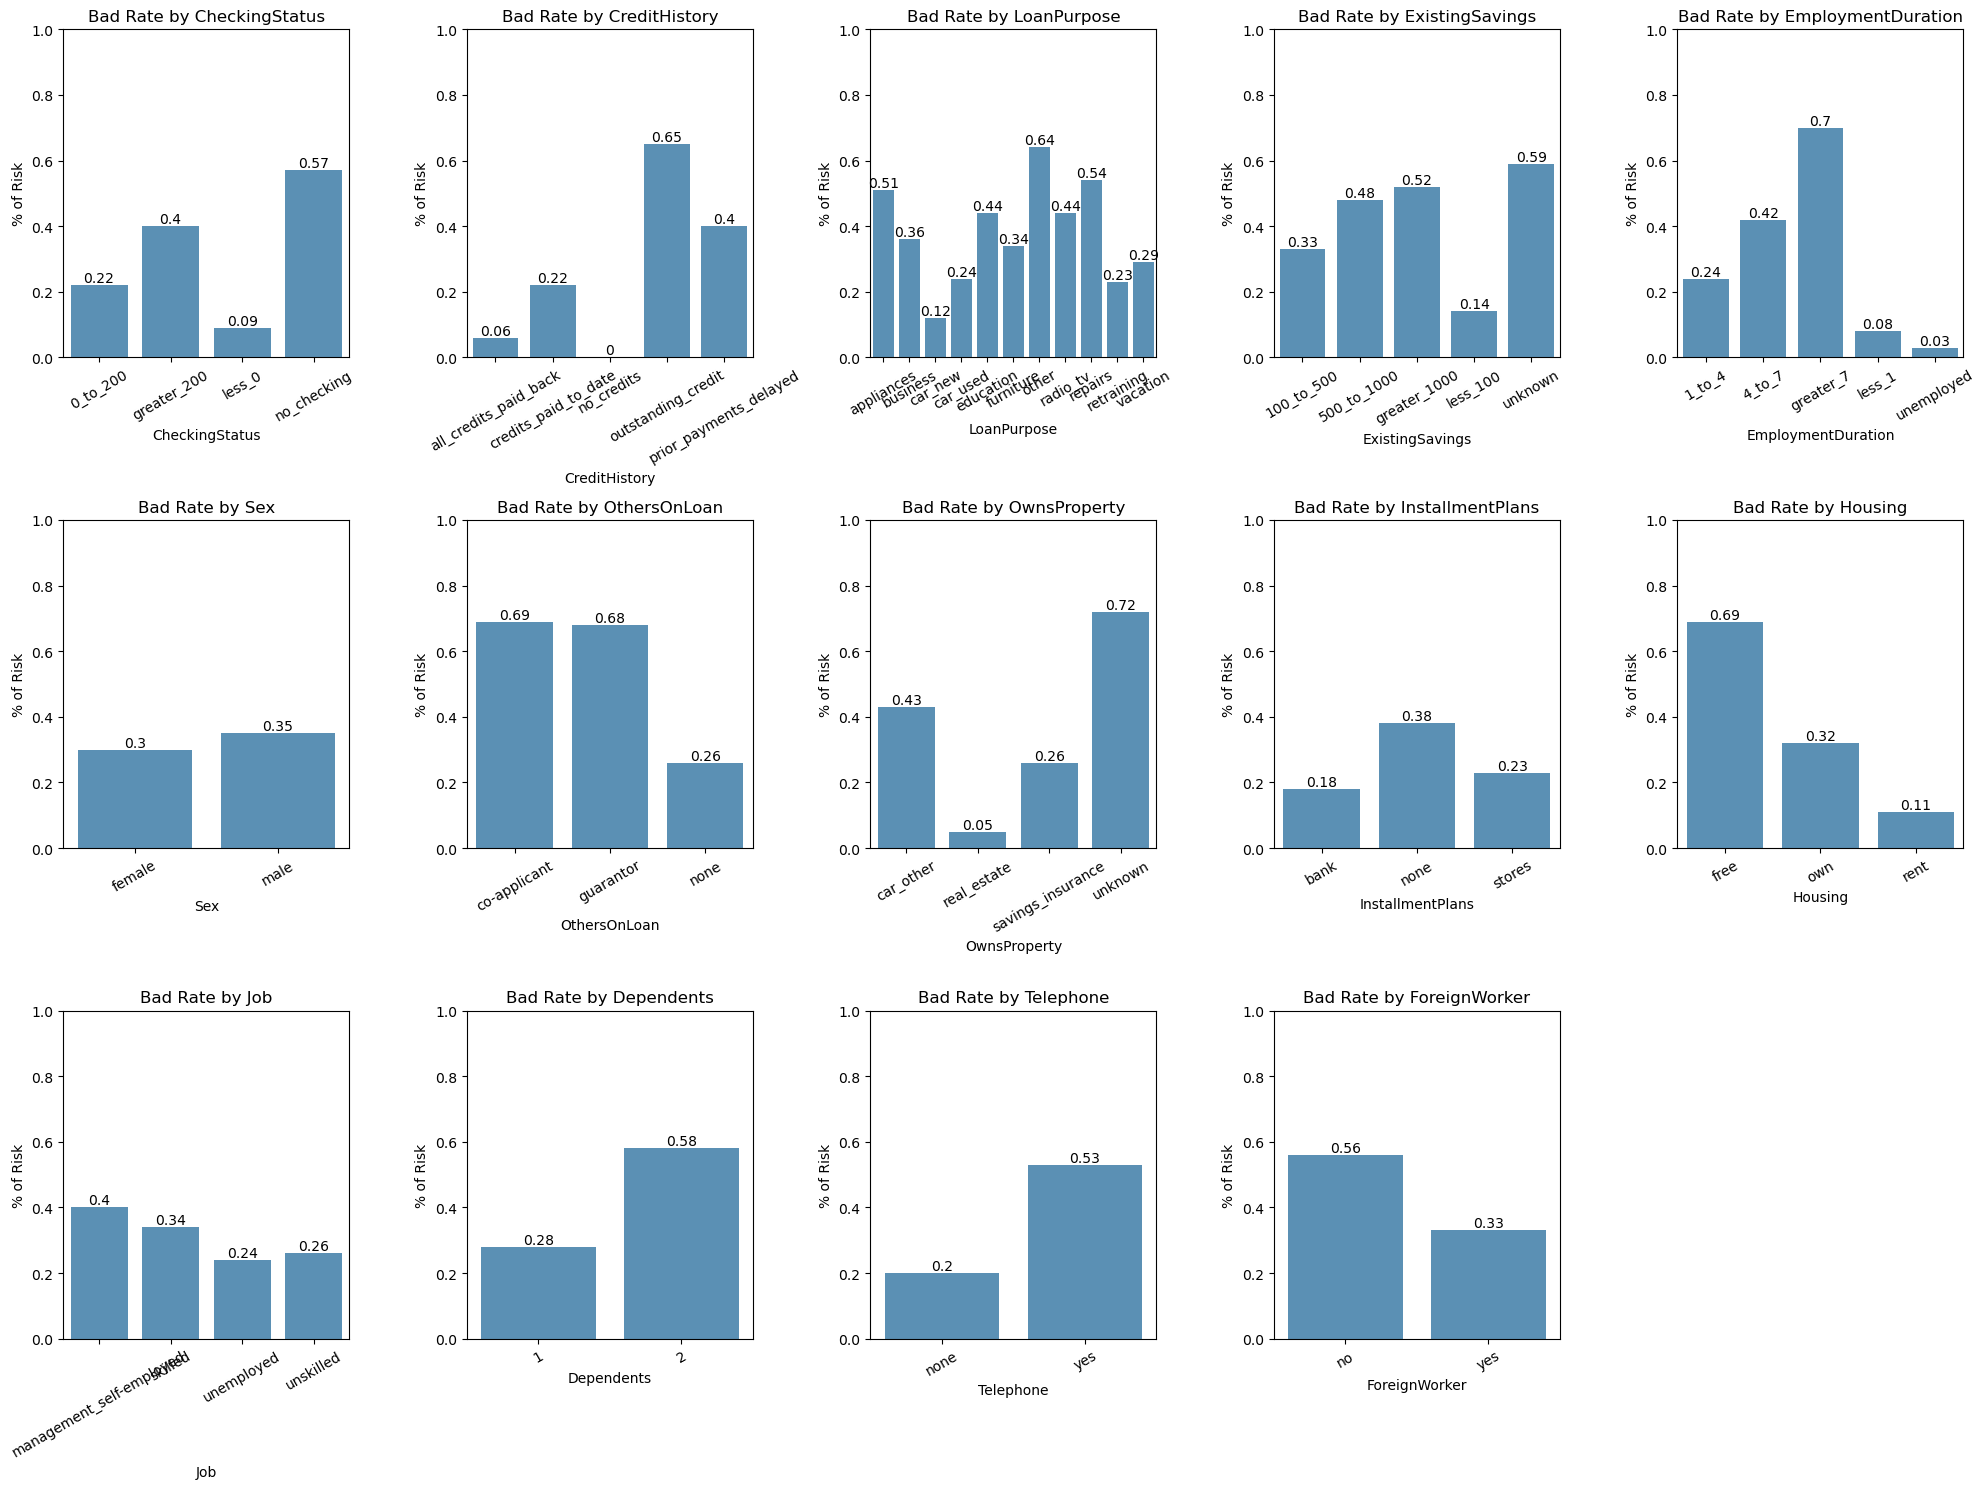

In [20]:
# Plot Categorical Features

# Identify categorical columns
num_categorical_cols = len(categorical_cols)

# Set up grid dimensions
cols = 5
rows = (num_categorical_cols + cols - 1) // cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  # Flatten to make indexing easier

# Loop over categorical columns
for i, col in enumerate(categorical_cols):
    df_smry = df_plot[['Risk', col]].groupby(col).mean().reset_index().round(2)

    ax = axes[i]  # Get the current axis
    sns.barplot(data=df_smry, x=col, y='Risk', ax=ax, alpha=.8)
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(col)
    ax.set_ylabel('% of Risk')
    ax.tick_params(axis='x', rotation=30)
    ax.set_ylim(0, 1)
    ax.set_title(f'Bad Rate by {col}')


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()